<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span><ul class="toc-item"><li><span><a href="#Импорт-данных" data-toc-modified-id="Импорт-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт данных</a></span></li><li><span><a href="#Проверка-данных-на-корректность" data-toc-modified-id="Проверка-данных-на-корректность-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка данных на корректность</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод-топ-10-городов-по-рейсам" data-toc-modified-id="Вывод-топ-10-городов-по-рейсам-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод топ 10 городов по рейсам</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Графики" data-toc-modified-id="Графики-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Графики</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Произвести выгрузки и подготовку данных авиакомпаний с помощью SQL, проверить гипотезу о различии среднего спроса на билеты во время различных событий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

## Аналитика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Импорт данных

In [2]:
aircraft_models = pd.read_csv('/datasets/query_1.csv')

In [3]:
flights_cities = pd.read_csv('/datasets/query_3.csv')

### Проверка данных на корректность

In [4]:
for table in [(aircraft_models, 'Модели самолетов и рейсы'), (flights_cities, 'Рейсы в города в сентябре 2018')]:
    df = table[0]
    print('Таблица:', table[1])
    print('Первые 5 строк таблицы:')
    display(df.head(5))
    print('INFO:')
    display(df.info())
    print('DESCRIBE:')
    display(df.describe())
    print('Количество дубликатов:', df.duplicated().sum())
    print('\n'+'-*'*50)

Таблица: Модели самолетов и рейсы
Первые 5 строк таблицы:


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

DESCRIBE:


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Количество дубликатов: 0

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Таблица: Рейсы в города в сентябре 2018
Первые 5 строк таблицы:


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

DESCRIBE:


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Количество дубликатов: 0

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


#### Вывод

* В таблицах нет пропусков и дубликатов;
* Колонкам назначены правильные типы данных;
* Среди городов есть явный outliner в виде Москвы, который принимает многократно больше рейсов, чем остальные города.

### Вывод топ 10 городов по рейсам

In [5]:
flights_cities = flights_cities.sort_values(by='average_flights', axis=0, ascending=False).reset_index(drop=True)
top10_cities = flights_cities[:10]
top10_cities

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


#### Вывод

Лидером предсказуемо оказалась Москва, следом с большим отставанием идут Санкт-Петербург и Новосибирск. 

## Графики

In [6]:
'''
    Функция для отрисовки горизонтальных столбчатых графиков.
'''
def horizontal_bar(labels, data, title, xlabel, figsize=(10, 5), precision=0):
    plt.rcdefaults()
    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=figsize)

    y_pos = np.arange(len(labels))

    ax.barh(y_pos, data, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    for i, v in enumerate(data):
        plt.text(v, i, " "+f'{v:.{precision}f}', color='blue', va='center', fontweight='bold')
    plt.show()

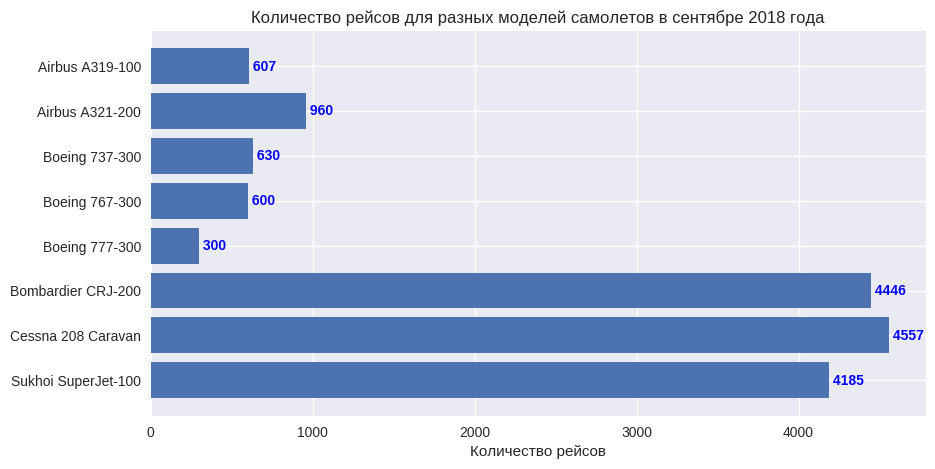

In [7]:
horizontal_bar(aircraft_models['model'], aircraft_models['flights_amount'],
              'Количество рейсов для разных моделей самолетов в сентябре 2018 года',
              'Количество рейсов')

In [8]:
aircraft_models['delta'] = aircraft_models['flights_amount'] / 4557
aircraft_models

,model,flights_amount,delta
0,Airbus A319-100,607,0.133202
1,Airbus A321-200,960,0.210665
2,Boeing 737-300,630,0.138249
3,Boeing 767-300,600,0.131666
4,Boeing 777-300,300,0.065833
5,Bombardier CRJ-200,4446,0.975642
6,Cessna 208 Caravan,4557,1.000000
7,Sukhoi SuperJet-100,4185,0.918367


Тройка лидеров сохраняет разброс в пределах 7.2%:
* Самое большое количество рейсов у самолета Cessna 208 Caravan. Вероятно, это связано с тем, что его часто используют для приватных и чартерных рейсов, а так же для полетов в труднодоступное места;
* На втором месте Bombardier CRJ-200;
* На третьем Sukhoi SuperJet-100.

Тройку лидеров замыкают распространненые в России модели самолетов для регулярных направлений.

---

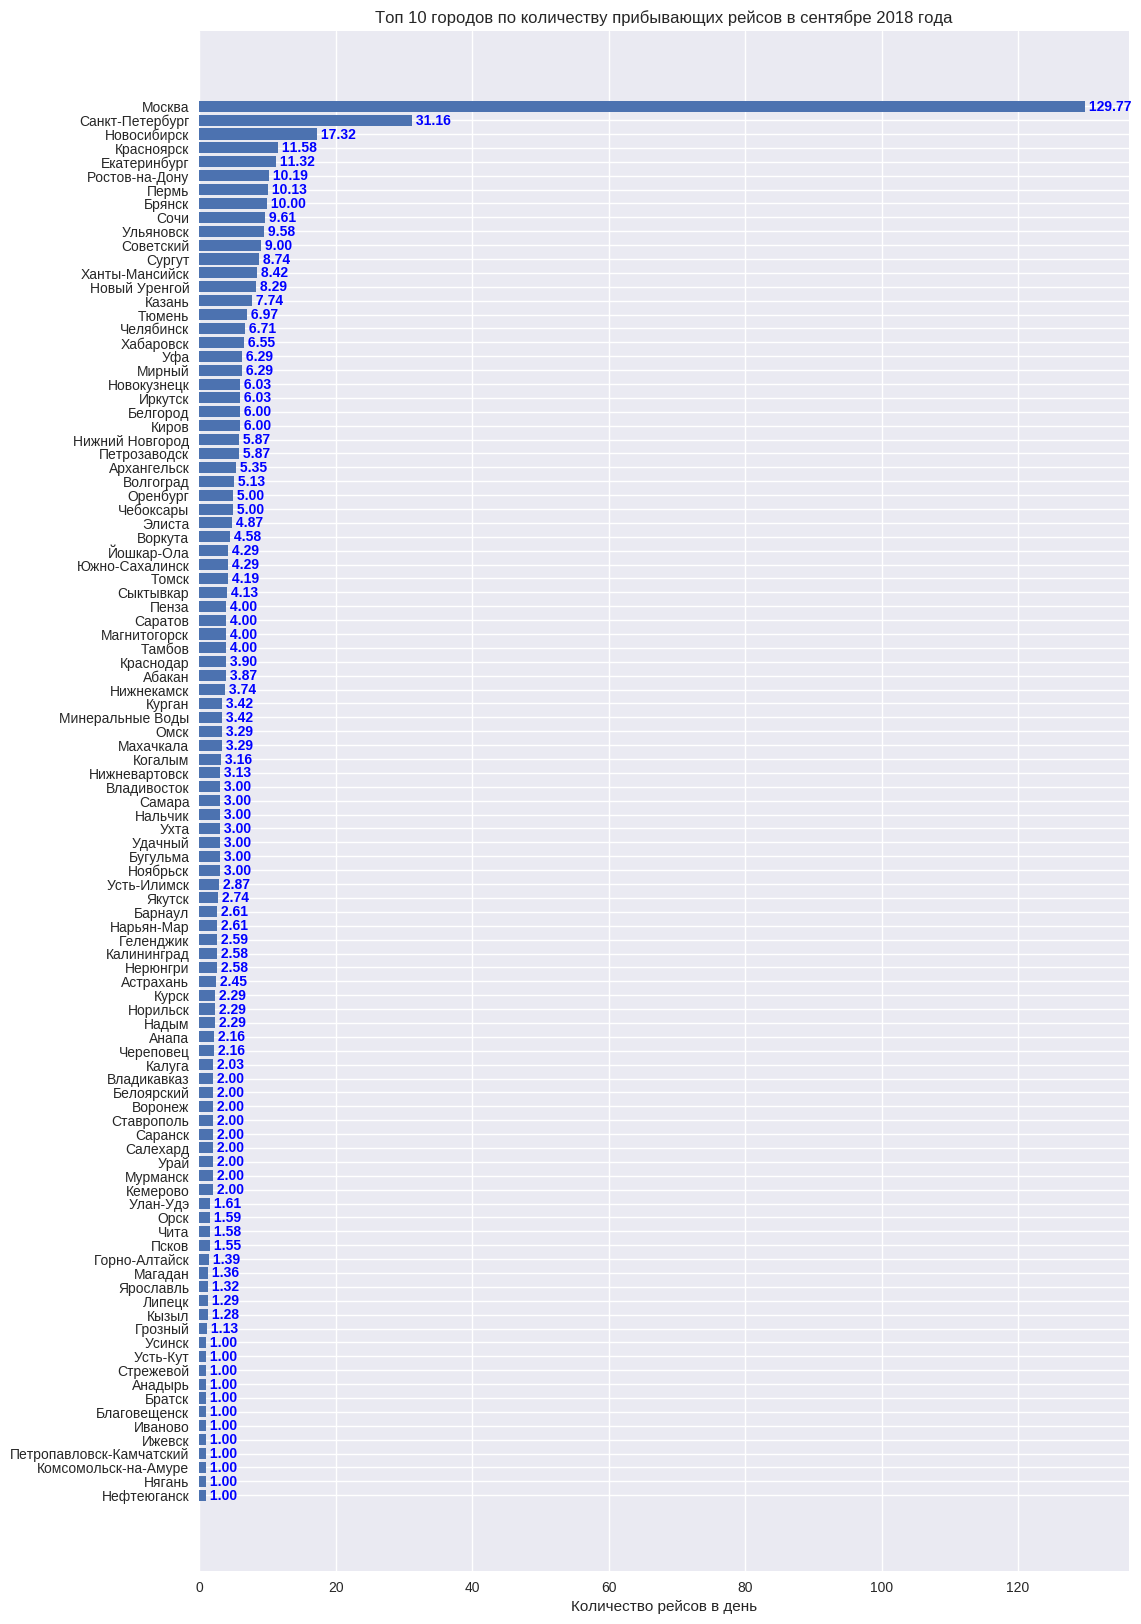

In [9]:
horizontal_bar(flights_cities['city'], flights_cities['average_flights'], 
               'Топ 10 городов по количеству прибывающих рейсов в сентябре 2018 года', 'Количество рейсов в день',
              figsize=(12,20), precision=2)

Медиана рейсов = 3, среднее = 5.49.

Лидером по количеству рейсов является Москва:
* Больше медианы в 43 раза;
* Больше среднего В 23.6 раза;
* Больше второго места на 316%.

---

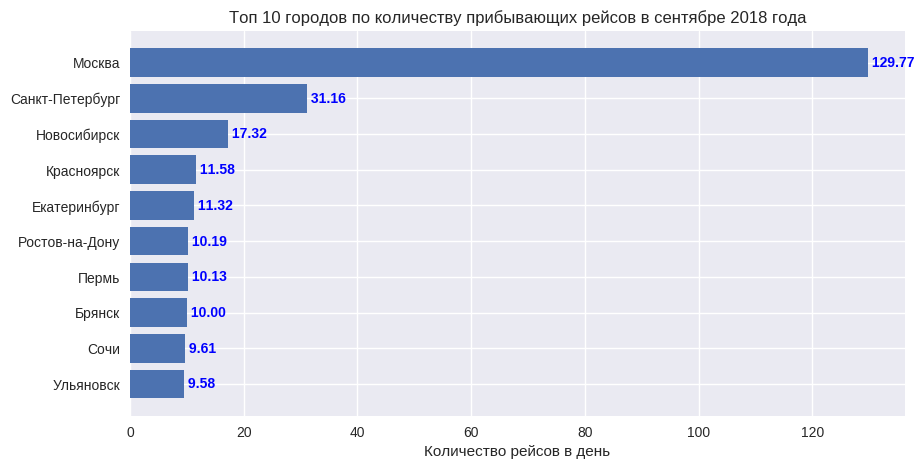

In [10]:
horizontal_bar(top10_cities['city'], top10_cities['average_flights'], 
               'Топ 10 городов по количеству прибывающих рейсов в сентябре 2018 года', 'Количество рейсов в день', precision=2)

Последние 7 мест в первой десятке обладают практически идентичным среднесуточным количеством рейсов.
Десятку лидеров по количеству рейсов в день замыкает город Ульяновск с среднием значением в 9.58 рейсов в день. 

## Вывод

* Моска является лидером по количеству рейсов с большим отрывом: *129.7* рейсов в день;
* На втором и третьем местах находятся Санкт-Петербург и Новосибирск, *31.16* и *17.32* рейсов в день соответственно.

Закономерно эти же 3 города являются [самыми населенными в России](http://www.statdata.ru/largest_cities_russia).

* Медианное значения среднесуточных рейсов для городов России равно *3*, среднее равно *5.6*;

Наибольшее количество рейсов в сентябре было совершено на самолете *Cessna 208 Caravan*. <br/>
Тройку лидеров замыкают распространненые в России модели самолетов для регулярных направлений:
* На втором месте *Bombardier CRJ-200*;
* На третьем Sukhoi *SuperJet-100*.
